# Machine Learning Basics with Scikit-learn: Day 3

## Unsupervised learning
Yesterday, we explored supervised machine learning models, which are training based on labeled data. In contrast, **unsupervised learning** uses machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention. Its ability to discover similarities and differences in information make it the ideal solution for exploratory data analysis, cross-selling strategies, customer segmentation, and image recognition. 

Many unsupervised learning models are available in [scikit-learn](https://scikit-learn.org/stable/unsupervised_learning.html). Today, We will focus on **clustering**. These functions seek to learn from the properties of the data an optimal division. The final goal is to label the data in groups of points.

We will start importing the libraries.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import fetch_olivetti_faces
from mpl_toolkits.mplot3d import Axes3D

Let's create some data points and we will use them to create our clusters. We will use the function `make_blobs` to 300 points spread among create five clusters in a 2D plane.  

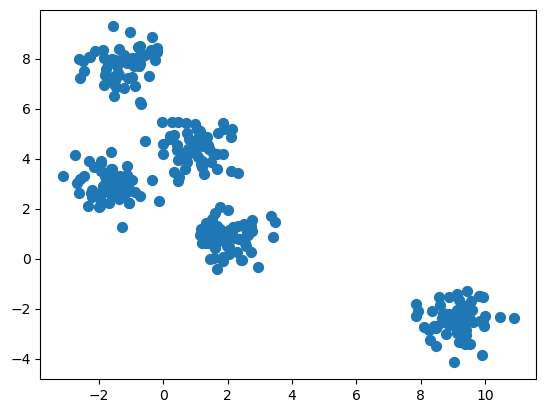

In [17]:
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

## k-Means
One of simplest algorithms to understand is *k-means* clustering. This clustering algorithm aims to partition *n* observations into *k* clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This algorithm **requires the number of clusters to be specified.** It scales well to large number of samples and has been used across a large range of application areas in many different fields. For more information about this algorithm, please check the [documentation](https://scikit-learn.org/stable/modules/clustering.html#k-means).

Let's start creating a model using the data created for this exercise. We will set five clusters:

In [7]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


We will visualize how each point was assinged to a cluster. A color represents a specific cluster. In total, we will see five groups:

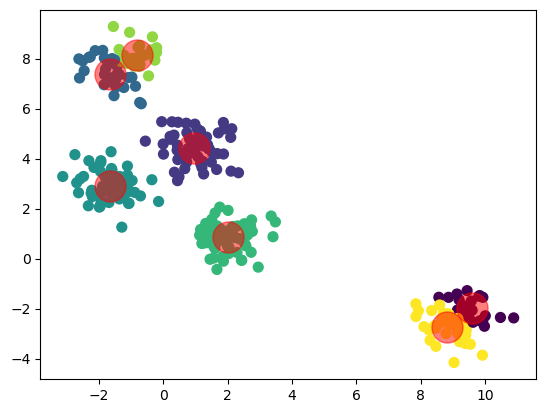

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=0.5)
plt.show()

And we can get more information about the clusters:

In [9]:
kmeans.cluster_centers_

array([[ 9.59457068, -1.98584771],
       [ 0.96475862,  4.4261437 ],
       [-1.65232268,  7.40116219],
       [-1.66877007,  2.91652498],
       [ 2.00401597,  0.84371973],
       [-0.80480529,  8.12945933],
       [ 8.8076046 , -2.72313794]])

In [10]:
kmeans.labels_

array([0, 5, 1, 6, 3, 3, 4, 1, 4, 2, 6, 6, 1, 2, 5, 1, 1, 4, 6, 3, 4, 3,
       1, 0, 3, 1, 3, 4, 5, 3, 4, 6, 1, 0, 6, 2, 4, 5, 3, 4, 1, 3, 1, 1,
       6, 3, 4, 3, 0, 3, 3, 4, 3, 3, 6, 3, 4, 2, 5, 0, 3, 4, 3, 2, 2, 6,
       6, 2, 3, 0, 3, 4, 0, 0, 0, 0, 0, 5, 1, 4, 2, 5, 1, 6, 6, 5, 4, 4,
       4, 3, 2, 4, 4, 0, 3, 5, 1, 5, 2, 1, 0, 3, 4, 5, 4, 1, 3, 4, 1, 3,
       1, 2, 3, 4, 6, 4, 1, 6, 3, 4, 1, 2, 6, 2, 6, 3, 3, 4, 4, 2, 4, 5,
       0, 5, 5, 4, 6, 6, 3, 0, 1, 0, 6, 3, 1, 3, 1, 3, 5, 1, 6, 5, 0, 1,
       0, 1, 3, 5, 6, 5, 3, 1, 2, 1, 1, 3, 1, 6, 5, 1, 4, 4, 1, 0, 4, 1,
       2, 2, 3, 4, 1, 3, 4, 1, 3, 2, 4, 1, 1, 1, 3, 6, 1, 2, 1, 1, 5, 3,
       2, 4, 3, 6, 1, 2, 4, 5, 1, 0, 3, 5, 4, 6, 4, 3, 1, 1, 2, 3, 3, 3,
       4, 1, 6, 4, 4, 3, 3, 5, 1, 2, 2, 1, 1, 0, 1, 3, 3, 1, 6, 4, 5, 6,
       2, 4, 1, 4, 6, 6, 2, 6, 2, 5, 5, 4, 3, 4, 4, 3, 5, 4, 4, 6, 1, 1,
       5, 4, 5, 2, 1, 6, 1, 3, 4, 2, 3, 1, 4, 4, 4, 1, 0, 0, 4, 4, 1, 3,
       4, 3, 2, 2, 6, 4, 3, 3, 0, 6, 6, 3, 4, 1], d

In [ ]:
pd.DataFrame({'x': X[:,0], 'y': X[:,1], 'cluster': kmeans.labels_})

### Exercise 1
The algorithm easily found the natural clusters from this data distribution. How would the algorithm predict the dots if we set 3 or 6 clusters? Run the algorithm with different number of clusters, and plot the clusters:

In [29]:
# Plot three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


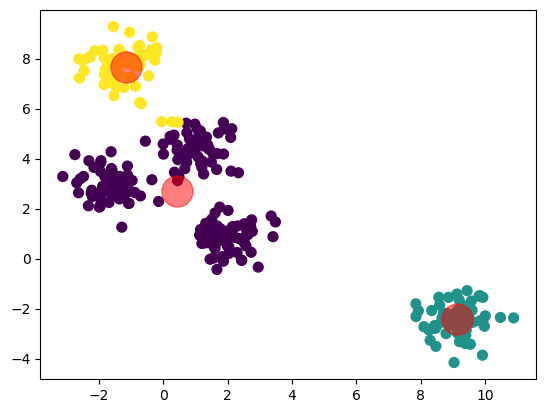

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=0.5)
plt.show()

In [31]:
# Plot five clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


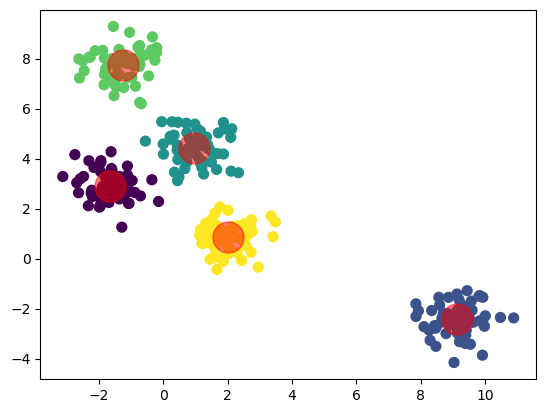

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=0.5)
plt.show()

### Using real data
We will use the wine dataset to check potential clusters. We will use the first two attributes: `alcohol` and `malic_acid`

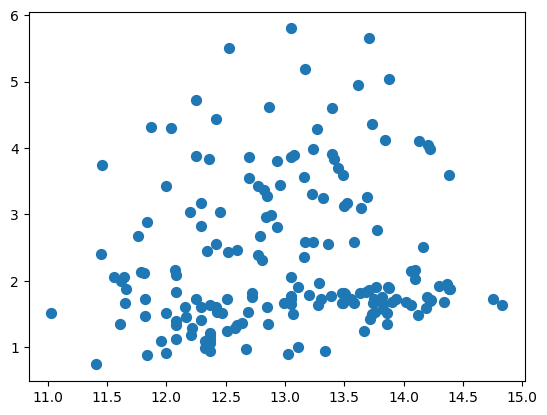

In [38]:
wine = datasets.load_wine()
X = wine.data[:,:2]
plt.scatter(X[:, 0], X[:, 1], s=50);

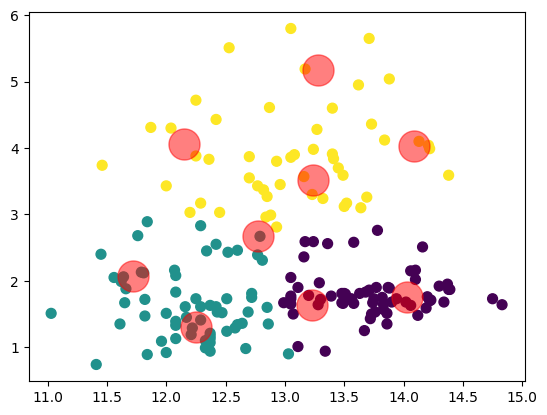

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=0.5)
plt.show()

### Exercise 2
Create a k-means model with 3 clusters

In [40]:
# Plot three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### How to determine the optimal number of clusters?

Should we create three clusters? Four? Five? There is a visual approach called **elbow method.** The idea behind is to implement k-means clustering on a given dataset for a range of values of number of clusters *k* (e.g k=1 to 10), and for each value of *k*, calculate the sum of squared errors (SSE).

Elbow method plot a line graph of the SSE for each value of *k*. If the line graph looks like an arm, the "elbow" on the arm is the value of optimal *k* (number of the cluster). k-means is used to minimize SSE. SSE tends to decrease toward 0 as we increase k and SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster.

The goal is to choose a optimal value of *k* that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

Let's plot the graph:

/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

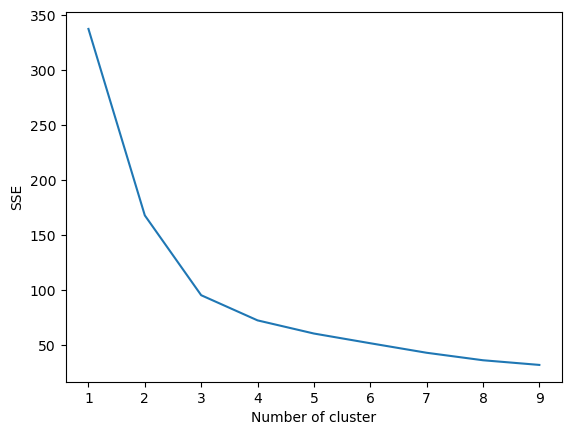

In [41]:
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

By checking this plot, we can create 3 clusters is the optimal number.

### Some applications
One interesting application of clustering is in color compression within images. For example, an image with millions of colors. In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

RGB can take values from 0 to 255 (256 in total). Since we have three colors, we can have 256 * 256 * 256 = 16,777,216. 

<img src="https://mk0nixsensorcommcpqi.kinstacdn.com/wp-content/uploads/2018/02/rgb_model.gif" alt="" width="400" height="244">

In other words, 16 million different colors can be represented in the RGB color space. 

For example, consider the image shown in the following figure, which is from the datasets module.

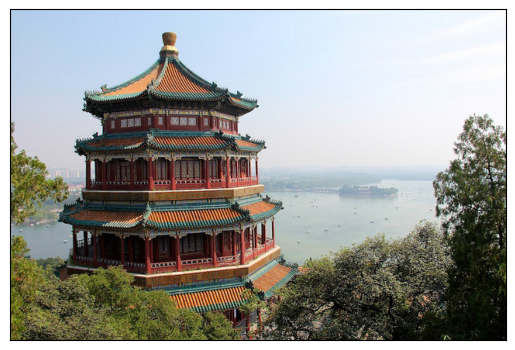

In [37]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

The image itself is stored in a three-dimensional array of size (height, width, RGB), containing red/blue/green contributions as integers from 0 to 255:

In [42]:
china.shape

(427, 640, 3)

The picture's size is 427 x 640 px. And given that each pixel saves colors with three different numbers (R,G,B), we will have 427 * 640 * 3 = 819,840 cells of information. 

Let's check the first pixel of this picture (x=0,y=0)

In [43]:
china[0][0]

array([174, 201, 231], dtype=uint8)

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space. We will reshape the data to `n_samples` x `n_features`, and rescale the colors so that they lie between 0 and 1:

In [44]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

How many unique colors do we have in this picture?

In [45]:
unique_original_colors = len(np.unique(data, axis=0))
unique_original_colors

96615

We have about 96,600 unique colors in this picture. Can we reduce the number of colors to 16? 
Let's reduce these colors to just 16 colors, using a k-means clustering across the pixel space.

In [46]:
kmeans = KMeans(n_clusters = 16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
unique_new_colors = len(np.unique(new_colors, axis=0))
unique_new_colors

16

We replaced each color to an approximation. Instead of using 16 millions of colors, we are now using 16 colors. How would the picture look after this transformation?

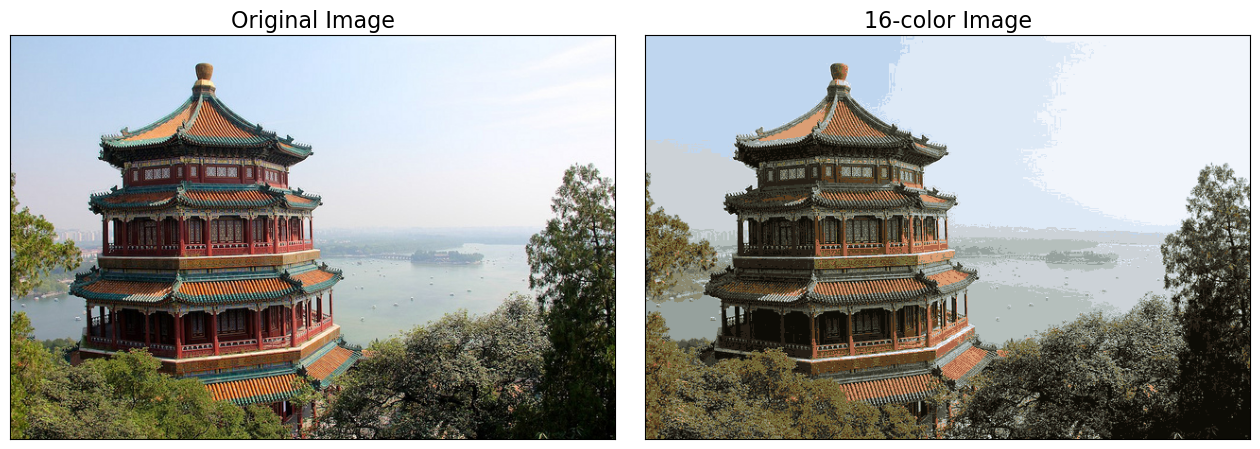

In [48]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

#### Exercise 3
How would this picture look with 4 colors?

In [54]:
# Create the k-mean model and calculate the new colors

kmeans = KMeans(n_clusters = 4)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [55]:
unique_new_colors = len(np.unique(new_colors, axis=0))
unique_new_colors

4

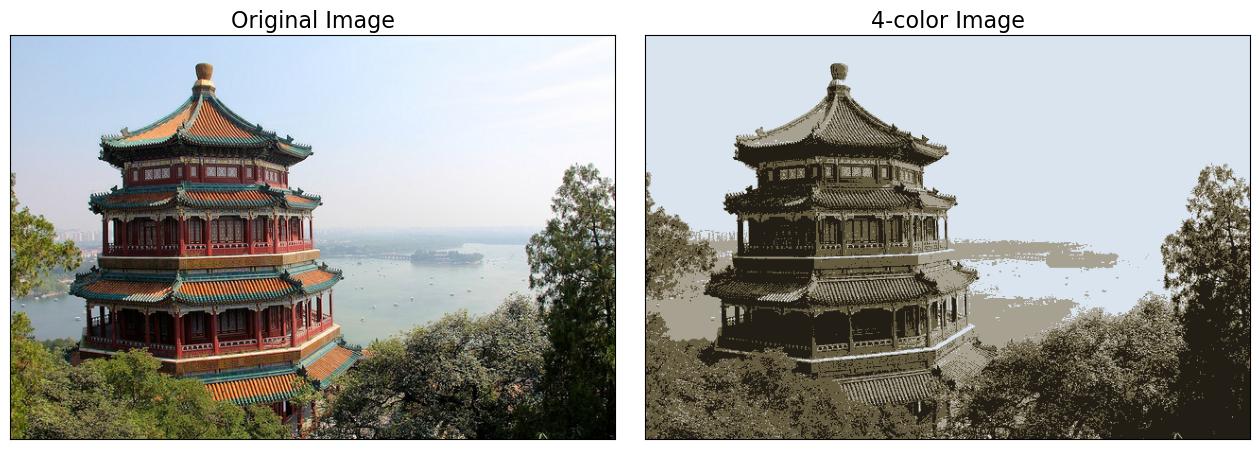

In [58]:
# Plot the new picture with 4 colors.

china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('4-color Image', size=16);

## Principal Component Analysis

We explore another broadly used of unsupervised algorithms called **principal component analysis** (PCA). PCA is fundamentally a dimensionality reduction algorithm. The goal of this method is to find a list of the principal axes in the data and using those axes to describe the dataset. Since we could have hundreds of features, PCA looks for reducing the number of dimensions and find *components* that can aggregate their information.

Its behavior is easiest to visualize by looking at a two-dimensional dataset. Consider the following 300 points:

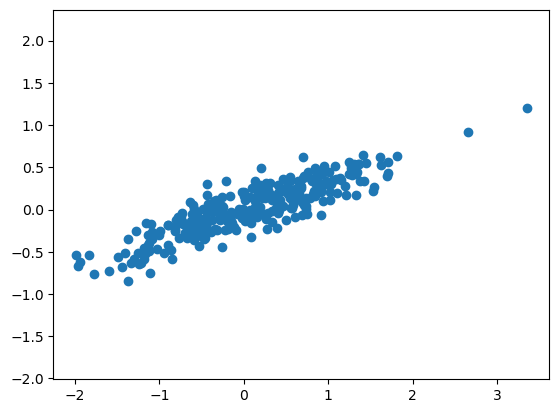

In [59]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 300)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables. Rather than attempting to predict the y values from the x values, we aim to understand the relationship between the x and y values.

In PCA, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using *scikit-learn*'s PCA estimator, we can compute this as follows:

In [61]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)

[[ 0.94625072  0.32343403]
 [-0.32343403  0.94625072]]


PCA now created two components that explain most of the variance among the data. How much variance does each component explain?

In [62]:
print(pca.explained_variance_)

[0.77935137 0.02004522]


In [63]:
print(pca.explained_variance_ratio_)

[0.97492456 0.02507544]


The first component explains 97.4% the variance among the dataset (0.77 units of variance), while the second component explains 0.02% (0.02 units of variance).

To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

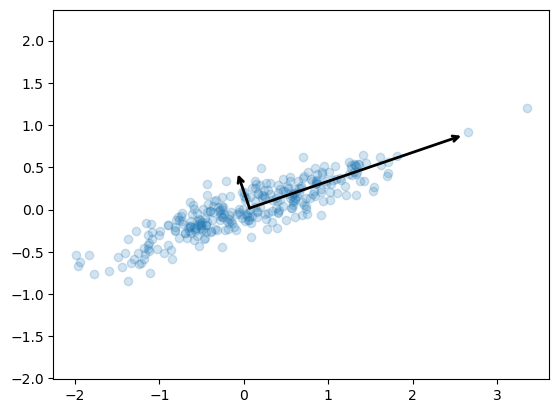

In [64]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ax = plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', pca.mean_ + v, pca.mean_, arrowprops=arrowprops)
plt.axis('equal');

These black arrows represent the principal axes of the data, and the length of the arrow is an indication of how "important" that axis is in describing the distribution of the data. More precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

This transformation from data axes to principal axes is an affine transformation, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

### Using PCA for data reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [65]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

In [66]:
print(X.shape)

(178, 13)


The wine dataset containst 13 features. Running a PCA will allow us reduce the number of features from 13 to 2, without losing too much data variance. 

In [72]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
print(pca.components_)

[[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
   1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
   6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
   9.99822937e-01]
 [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
   9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
   5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
  -1.77738095e-02]]


In [68]:
print(pca.explained_variance_)

[99201.78951748   172.53526648]


In [69]:
print(pca.explained_variance_ratio_)

[0.99809123 0.00173592]


We can observe that most variance is explained by one component (99.8%). In other words, most data variation can be explained by one component.

Let's check visually how each observation is located on this PCA reduction. We will paint each observation according to the wine class (`y`). 

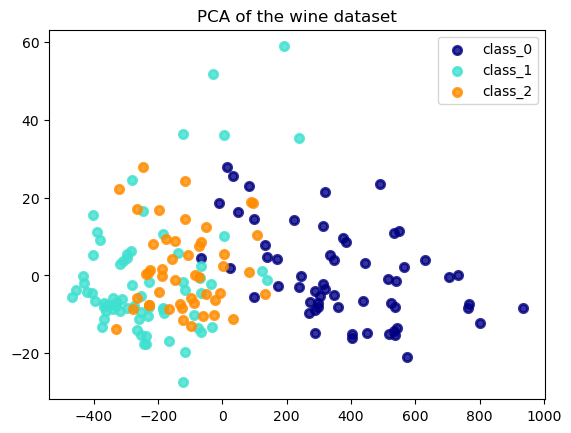

In [73]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], wine.target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of the wine dataset')
plt.show()

### Exercise 4
Let's try this PCA reduction exercise again using the Boston dataset. Create two components of the Boston dataset using PCA, check how much variance is explained by each component, and plot the PCA plane.

In [ ]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [ ]:
print(X.shape)

In [ ]:
# Compute the new PCA


In [ ]:
# Print the explained variance


In [ ]:
# Print the explained variance ratio (percentage of variance explained by each component)


We kept the final plot. You will see that darker green means a higher house value. 

In [ ]:
#plt.figure()
#plt.scatter(X_boston[:, 0], X_boston[:, 1], c=y, cmap='Greens')
#plt.title('PCA of the Boston dataset')
#plt.show()

### Choosing the number of components
Like k-Means, we can estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components. We will run this exercise with the Boston dataset.

In [ ]:
pca = PCA().fit(boston.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 13-dimensional variance is contained within the first *N* components. For example, we see that the first component contains approximately 96% of the variance, and with 3 components we are close to describe 100% of the variance.

The two-dimensional projection did not loose a lot of information (as measured by the explained variance). Having two components retains close to 98% of the variance. Looking at this plot for a high-dimensional dataset can help us understand the level of redundancy present in multiple observations.

Let's compute the PCA using three components. How would the components like?

In [ ]:
pca = PCA(n_components=3)
X_boston = pca.fit(X).transform(X)

In [ ]:
fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X_boston[:, 0], X_boston[:, 1], X_boston[:, 2], c=y, cmap='Greens', edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

### Face recognition
We will check the use of PCA for face recognition. We will load the [Load the Labeled Faces in the Wild (LFW) people dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html) available in scikit-learn. This dataset is a collection of JPEG pictures of famous people collected over the internet, all details are available on the [official website](http://vis-www.cs.umass.edu/lfw/). Each picture is centered on a single face. The typical task is called Face Verification: given a pair of two pictures, a binary classifier must predict whether the two images are from the same person.

In [ ]:
faces = fetch_lfw_people(min_faces_per_person=40)
print(faces.target_names)
print(faces.images.shape)

In [ ]:
fig, axes = plt.subplots(6, 10, figsize=(18, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.data[i].reshape(62, 47), cmap='binary_r')

Because this is a large dataset with a high-dimensionality (62 height pixels * 47 width pixels = 2,914 pixels per image), we can use PCA components to reduce the information used for each one of these pictures. Instead of using these ~3,000 features, let's try to reduce it to 150. 

In [ ]:
pca = PCA(n_components=150)
pca.fit(faces.data)

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors," so these types of images are often called "eigenfaces").

In [ ]:
fig, axes = plt.subplots(6, 10, figsize=(18, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

We sum all the explained variance of each component to check how much variance is explained by these 150 components

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

We see that 150 components account for 94% of the variance. That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the original data. To make this more concrete, we can compare the input images with the images reconstructed from these 150 components:

In [ ]:
# Compute the components and projected faces
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

In [ ]:
# Plot the picture
fig, axes = plt.subplots(6, 10, figsize=(18, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(62, 47), cmap='bone')

### Exercise 5
Try this exercise using the [Olivetti faces dataset](https://scikit-learn.org/stable/datasets/real_world.html#olivetti-faces-dataset) This dataset contains a set of face images taken between April 1992 and April 1994 at AT&T Laboratories Cambridge. The sklearn.datasets.fetch_olivetti_faces function is the data fetching / caching function that downloads the data archive from AT&T. 

In [ ]:
faces2 = fetch_olivetti_faces(shuffle=True, random_state=rng)

In [ ]:
print(faces2.images.shape)

**Note**: The image size is 64 x 64. You must update the reshape command from `reshape(62, 47)` to `reshape(64, 64)`.

In [ ]:
fig, axes = plt.subplots(6, 10, figsize=(18, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces2.data[i].reshape(64, 64), cmap='binary_r')

In [ ]:
# Create the components


In [ ]:
# Compute the components and projected faces


In [ ]:
# Plot the artificial picture


## More Resources if you are interested in learning more
* [In Depth: k-Means Clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)
* [In Depth: Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)